In [115]:
import numpy as np
import pandas as pd
import train
from prometheus_api_client.utils import parse_datetime
from prometheus_api_client import PrometheusConnect

In [110]:

prom = PrometheusConnect(url ="http://localhost:9090", disable_ssl=True)

# Get the list of all the metrics that the Prometheus host scrapes
prom.all_metrics()

['go_gc_duration_seconds',
 'go_gc_duration_seconds_count',
 'go_gc_duration_seconds_sum',
 'go_goroutines',
 'go_info',
 'go_memstats_alloc_bytes',
 'go_memstats_alloc_bytes_total',
 'go_memstats_buck_hash_sys_bytes',
 'go_memstats_frees_total',
 'go_memstats_gc_cpu_fraction',
 'go_memstats_gc_sys_bytes',
 'go_memstats_heap_alloc_bytes',
 'go_memstats_heap_idle_bytes',
 'go_memstats_heap_inuse_bytes',
 'go_memstats_heap_objects',
 'go_memstats_heap_released_bytes',
 'go_memstats_heap_sys_bytes',
 'go_memstats_last_gc_time_seconds',
 'go_memstats_lookups_total',
 'go_memstats_mallocs_total',
 'go_memstats_mcache_inuse_bytes',
 'go_memstats_mcache_sys_bytes',
 'go_memstats_mspan_inuse_bytes',
 'go_memstats_mspan_sys_bytes',
 'go_memstats_next_gc_bytes',
 'go_memstats_other_sys_bytes',
 'go_memstats_stack_inuse_bytes',
 'go_memstats_stack_sys_bytes',
 'go_memstats_sys_bytes',
 'go_threads',
 'net_conntrack_dialer_conn_attempted_total',
 'net_conntrack_dialer_conn_closed_total',
 'net_con

In [111]:
from prometheus_api_client import MetricSnapshotDataFrame, MetricRangeDataFrame
import datetime as dt

metric_data = prom.get_metric_range_data(
    metric_name='up',
    start_time=(dt.datetime.now() - dt.timedelta(minutes=10)),
    end_time=dt.datetime.now(),
)
metric_df = MetricRangeDataFrame(metric_data)
metric_df.head()

,__name__,instance,job,value
timestamp,,,,
1.637427e+09,up,localhost:9090,prometheus,1
1.637427e+09,up,localhost:9090,prometheus,1
1.637427e+09,up,localhost:9090,prometheus,1
1.637427e+09,up,localhost:9090,prometheus,1
1.637427e+09,up,localhost:9090,prometheus,1


In [113]:
metric_df.index = pd.to_datetime(metric_df.index,unit='s')
metric_df.head()

,__name__,instance,job,value
timestamp,,,,
2021-11-20 16:46:31.335000038,up,localhost:9090,prometheus,1
2021-11-20 16:46:36.345000029,up,localhost:9090,prometheus,1
2021-11-20 16:46:41.339999914,up,localhost:9090,prometheus,1
2021-11-20 16:46:46.345999956,up,localhost:9090,prometheus,1
2021-11-20 16:46:51.335999966,up,localhost:9090,prometheus,1


In [116]:
start_time = parse_datetime("30d")
end_time = parse_datetime("now")

query_range = prom.custom_query_range("rate(go_memstats_gc_cpu_fraction[10m])",start_time=start_time,
    end_time=end_time,
    step='5m')

In [117]:
MetricRangeDataFrame(query_range)

,instance,job,value
timestamp,,,
1636115737,localhost:9090,prometheus,0.0000013558290551195441
1636116037,localhost:9090,prometheus,0.0000013879346465300164
1636116337,localhost:9090,prometheus,2.0392867798036572e-07
1636116637,localhost:9090,prometheus,2.1508215497188107e-07
1636116937,localhost:9090,prometheus,1.7527659861509858e-07
...,...,...,...
1637419837,localhost:9090,prometheus,5.399652286638857e-08
1637420137,localhost:9090,prometheus,6.741647467828577e-08
1637420437,localhost:9090,prometheus,6.727290312786765e-08


In [118]:
query_range

[{'metric': {'instance': 'localhost:9090', 'job': 'prometheus'},
  'values': [[1636115737, '0.0000013558290551195441'],
   [1636116037, '0.0000013879346465300164'],
   [1636116337, '2.0392867798036572e-07'],
   [1636116637, '2.1508215497188107e-07'],
   [1636116937, '1.7527659861509858e-07'],
   [1636117237, '1.6114383085437714e-07'],
   [1636117537, '1.4686644536785978e-07'],
   [1636117837, '1.133900767052159e-07'],
   [1636118137, '5.685662555810184e-08'],
   [1636118437, '8.421309220738388e-08'],
   [1636118737, '1.3519115649504755e-07'],
   [1636119037, '1.0695472520263891e-07'],
   [1636119337, '1.0608535578679001e-07'],
   [1636119637, '1.312344607756049e-07'],
   [1636119937, '1.0320263212713893e-07'],
   [1636120237, '1.0166092757998076e-07'],
   [1636120537, '7.78173749509908e-08'],
   [1636120837, '2.8087612175460313e-08'],
   [1636121137, '3.095301431298589e-08'],
   [1636121437, '8.668124493781674e-08'],
   [1636121737, '1.395793655876498e-07'],
   [1636122037, '1.11243351

In [140]:
df = pd.DataFrame(query_range[0]['values'],columns=['ds','y'])
df['ds'] = pd.to_datetime(df['ds'],unit='s').astype('datetime64[ns, Asia/Jerusalem]').dt.tz_localize(None)
df['y'] = df['y'].astype(float)
df

,ds,y
0,2021-11-05 14:35:37,1.355829e-06
1,2021-11-05 14:40:37,1.387935e-06
2,2021-11-05 14:45:37,2.039287e-07
3,2021-11-05 14:50:37,2.150822e-07
4,2021-11-05 14:55:37,1.752766e-07
...,...,...
445,2021-11-20 16:50:37,5.399652e-08
446,2021-11-20 16:55:37,6.741647e-08
447,2021-11-20 17:00:37,6.727290e-08
448,2021-11-20 17:05:37,6.719714e-08


In [121]:
df_re=df.resample('1min',on='ds').mean()
df_re

,y
ds,
2021-11-05 14:35:00,1.355829e-06
2021-11-05 14:36:00,NaN
2021-11-05 14:37:00,NaN
2021-11-05 14:38:00,NaN
2021-11-05 14:39:00,NaN
...,...
2021-11-20 17:06:00,NaN
2021-11-20 17:07:00,NaN
2021-11-20 17:08:00,NaN


In [66]:
end_time = parse_datetime("now")
end_time

datetime.datetime(2021, 11, 20, 8, 51, 1, 942229)

In [122]:
with open('test_queries.txt') as f:
    queries = f.read().splitlines()

In [123]:
queries

['go_memstats_alloc_bytes', 'rate(go_memstats_alloc_bytes_total[1m])']

In [142]:
start_time = parse_datetime("5h")
end_time = parse_datetime("now")
df = train.query_to_df(prom, queries[1], start_time, end_time, "5s")
m, forecast = train.fit_predict(df, periods=300, freq='5s')

C:\Users\Yair\miniconda3\lib\site-packages\dateparser\date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [143]:
df

,ds,y
0,2021-11-20 14:31:41,44350.703662
1,2021-11-20 14:31:46,44358.294700
2,2021-11-20 14:31:51,44183.315457
3,2021-11-20 14:31:56,43811.511471
4,2021-11-20 14:32:01,44319.406567
...,...,...
3596,2021-11-20 19:31:21,44450.261780
3597,2021-11-20 19:31:26,44286.347937
3598,2021-11-20 19:31:31,43910.551960
3599,2021-11-20 19:31:36,44509.117353


In [144]:
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-20 14:31:41,54249.071148,-181732.293709,283124.205194
1,2021-11-20 14:31:46,54251.835510,-193426.965188,282514.633581
2,2021-11-20 14:31:51,54254.599873,-175678.846984,278818.482003
3,2021-11-20 14:31:56,54257.364236,-196633.593531,308136.953065
4,2021-11-20 14:32:01,54260.128598,-190920.673681,297335.559091
...,...,...,...,...
3896,2021-11-20 19:56:21,80922.113693,-162577.840253,293273.806115
3897,2021-11-20 19:56:26,80946.822191,-175655.877948,319475.129975
3898,2021-11-20 19:56:31,80971.530690,-155657.953132,308745.621467
3899,2021-11-20 19:56:36,80996.239188,-148371.678980,332424.674379


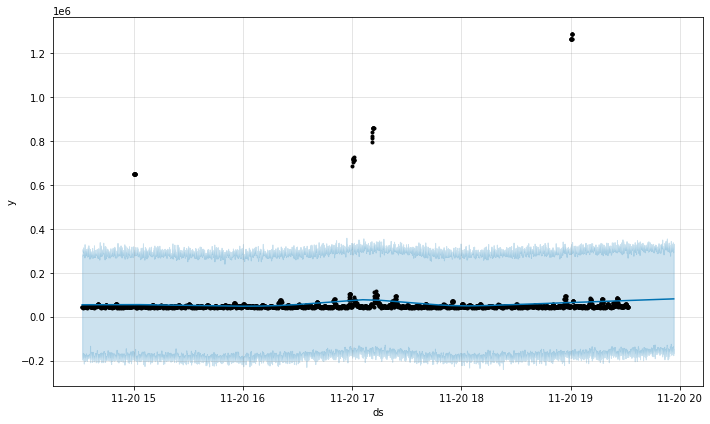

In [145]:
fig = m.plot(forecast)